# Wine Quality Dataset
## Aim
This dataset was downloaded from the UCI machine learning repository to predict wine quality based on some physical properties of wine.

## Data description
Each sample has the following 11 input variables. Below is the list of the name of each feature:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

The target of the learning task is to predict the wine quality, which is also called the output variable:

12. quality

At this moment, we can assert that this is a supervised learning problem, but we still cannot determine whhehter this is a classification or regression problem unless we scrutinize the type of target variable. Thus, our first step is to preprocess the dataset to check the type of target variable. 


## Library
import useful libraries to analyse the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn')


## 1. Data loading

In [2]:
data = pd.read_csv("./data/WineQT.csv")
print("data shape is : ", data.shape)
data.head()

data shape is :  (1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,3.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

By checking the dataframe, we can find that
* There are 1142 samples, and each sample has 12 features. This data size is enough for training most models we have learned in this unit. 
*The dataset has been well pre-processed. All data types are numerical based. We do not need to use any encoder to transform the feature data. 
* There is no NA type of data implying that no value is missing from any sample. 

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.533963,0.268364,2.532152,0.091307,15.615486,45.914698,0.997605,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.189788,0.196686,1.355917,0.116563,10.250486,32.782130,0.029635,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.397500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996700,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997855,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,2.320000,1.000000,15.500000,3.092000,68.000000,289.000000,1.996510,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
# Drop columns ID , because we don't need it.

data.drop(columns="Id",inplace=True)

#the unique quality bb
print("The Value Quality ",data["quality"].unique())

The Value Quality  [5 6 7 4 8 3]


## By inspecting the values of target variables, we can find that the wine quality only has six discrete values. Based on the datatype of the target variable, we can conclude that it is appropriate to run a classification model to predict wine quality based on other features.  

Our next step is to check the distribution of each feature variable. 

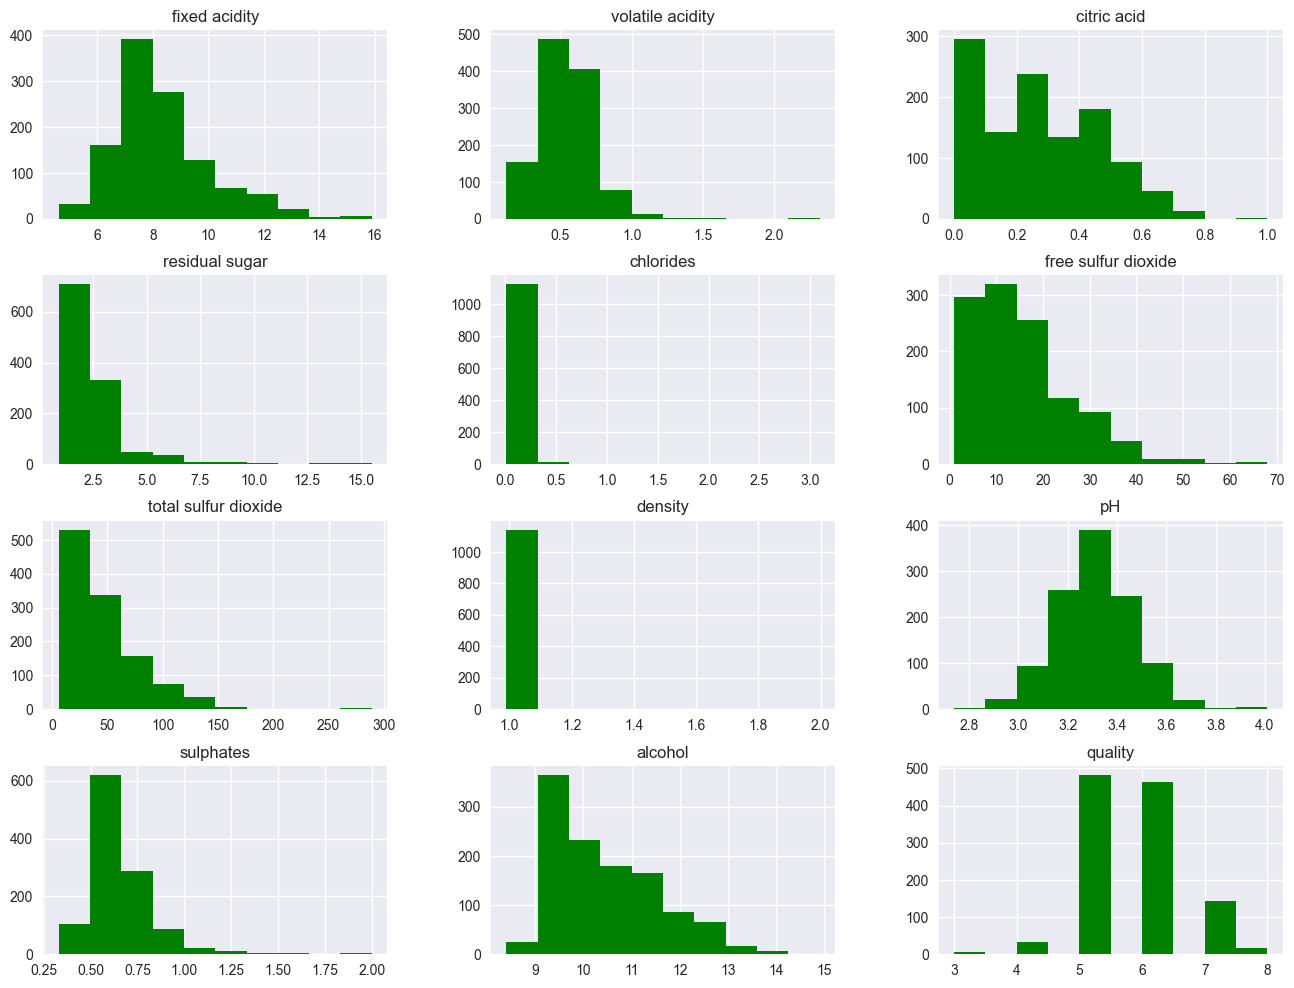

In [7]:
data.hist(bins=10 ,figsize=(16,12), color = 'Green')
plt.show()

From distributions of these features, we can observe that the distribution of "chlorides" and "density" features is very concentrated. It is likely that these two features are not useful for predicting wine quality. 

Next, we also check the distribution of the target variable. 

Text(0.5, 1.0, 'Wine Quality Class Distribution \n (Higher quality is better)')

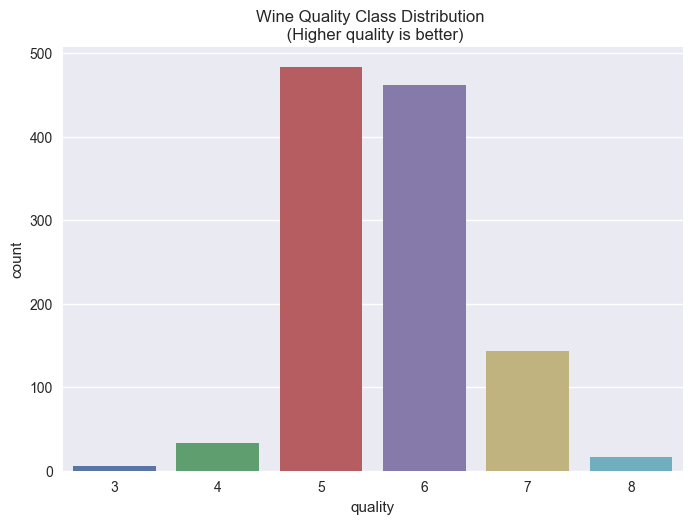

In [8]:
sns.countplot(x='quality',data=data,)
plt.title('Wine Quality Class Distribution \n (Higher quality is better)', 
          fontsize=12)

We can observe that:

1. The target variable 'quality' has six different values, which are 3,4,5,6,7,8;
2. The distribution of target variable is very uneven. 

We believe that all features should be useful for model training. Thus, after checking the distributions of these features and the target variable, we decide to train a model with all these features to predict wine quality. 

## 2. Data Preprocessing

### 2.1 Train Test Split

* It is essential to split dataset as a training set and a test set because test set can be used as unseen samples to evaluate our model to avoid overfitting. 
* It is proper to allocate 80%-90% samples to the training set and the rest samples to the test set.
* We sort all data samples by the descending order of wine quality before we split the dataset as a training set and a test set. 

In [15]:
from sklearn.model_selection import train_test_split
print(data['quality'].value_counts())

x_ex1 = data.copy().drop(columns=['quality'])
y_ex1 = data.copy()['quality']
x_ex1_array = x_ex1.values
y_ex1_array = y_ex1.values
x_train, x_test, y_train, y_test = train_test_split(x_ex1_array, y_ex1_array, test_size=0.1)

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64


In [10]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,3.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2.2 Feature Scaling
* Before training a model, a critical preprocess step is to normalise feature values because these features are measured in different units and  value ranges of these features can have giant discrepancies 

Our next step is to use StandardScaler to normalize these features

In [11]:
from sklearn.preprocessing import StandardScaler

obje_ss=StandardScaler()

x_train_ss = obje_ss.fit_transform(x_train)
x_test_ss = obje_ss.fit_transform(x_test)

## 3. Neural Network

### 3.1 Model generation

* Neural network is the most advanced model we have learned in this unit. Firstly, we attempt to train a neural network model to predict the wine quality based on all features, and plot the train loss and model accuracy, respectively. 
* We setup 3 hidden layers in the neural network with 15 neurons in hidden layer 1, 10 neurons in hidden layer 2 and 5 neurons in hidden layer 3. 
* We adopt 'tanh' as the activataion function, and 'sgd' as the algorithm to train the neural network. 


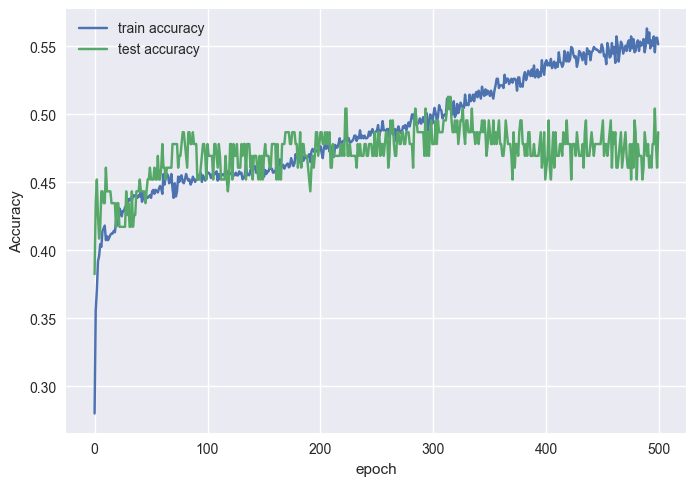

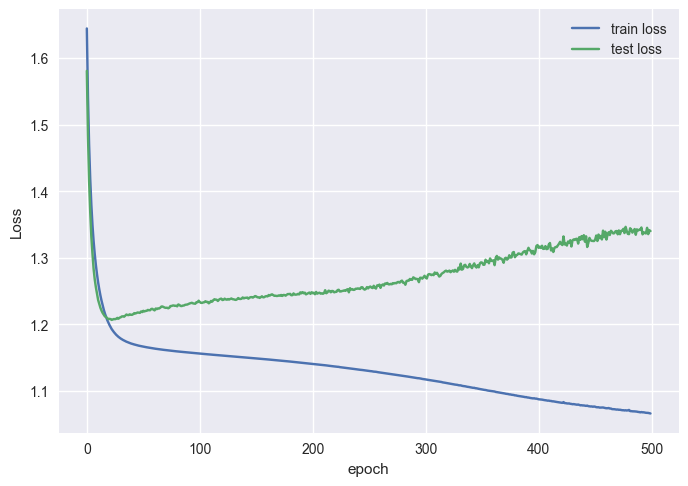

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.base import clone
from sklearn.metrics import log_loss
mlp = MLPClassifier(
    solver='sgd',
    activation='tanh',
    random_state=42,
    hidden_layer_sizes=(15,10,5),
    learning_rate_init=0.001,
    learning_rate='constant',
    max_iter=1,
)



def my_logloss(true_label, predicted):
    true_label = true_label-3
    b = np.zeros((true_label.size,6))
    b[:,true_label] = 1
    N = predicted.shape[0]
    ce = -np.sum(b * np.log(predicted)) / N
    return ce


""" Home-made mini-batch learning
    -> not to be used in out-of-core setting!
"""
N_TRAIN_SAMPLES = x_train_ss.shape[0]
N_EPOCHS = 500
N_BATCH = 30
N_CLASSES = np.array([3,4,5,6,7,8])

scores_train = []
scores_test = []
train_loss = []
test_loss = []

# epoch
epoch = 0
while epoch < N_EPOCHS:
    # shuffing
    random_perm = np.random.permutation(x_train_ss.shape[0])
    mini_batch_index = 0
    while True:
        # mini-batch
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        mlp.partial_fit(x_train_ss[indices], y_train[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # train record
    scores_train.append(mlp.score(x_train_ss, y_train))
    y_pred = mlp.predict_proba(x_train_ss)
    train_error = log_loss(y_train,y_pred)
    train_loss.append(train_error)

    # test record
    scores_test.append(mlp.score(x_test_ss, y_test))
    y_pred = mlp.predict_proba(x_test_ss)
    test_error = log_loss(y_test, y_pred)
    test_loss.append(test_error)

    epoch += 1

# plot
plt.plot(scores_train,label='train accuracy')
plt.plot(scores_test,label='test accuracy')
plt.legend(['train accuracy', 'test accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(train_loss,label='train loss')
plt.plot(test_loss,label='test loss')
plt.legend(['train loss', 'test loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()


### 3.2 Model evaluation
* Desipte the advance of neural netwokr, the training loss and test loss are not reduced effectively. In particular, the accuracy on the test set is terrible with a very low value. Thus, we will explore to evaluate the trained model with more complicated evaluation methods. 
* We apply the test dataset to evaluate the nerual network model and corss validation will be adopted to validate the model performance

Results on the test set:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.66      0.71      0.69        49
           6       0.60      0.61      0.60        46
           7       0.47      0.44      0.45        16

    accuracy                           0.61       115
   macro avg       0.34      0.35      0.35       115
weighted avg       0.58      0.61      0.60       115

[[ 0  0  1  0  0  0]
 [ 0  0  2  1  0  0]
 [ 0  0 35 10  4  0]
 [ 0  0 14 28  4  0]
 [ 0  0  1  8  7  0]
 [ 0  0  0  0  0  0]]


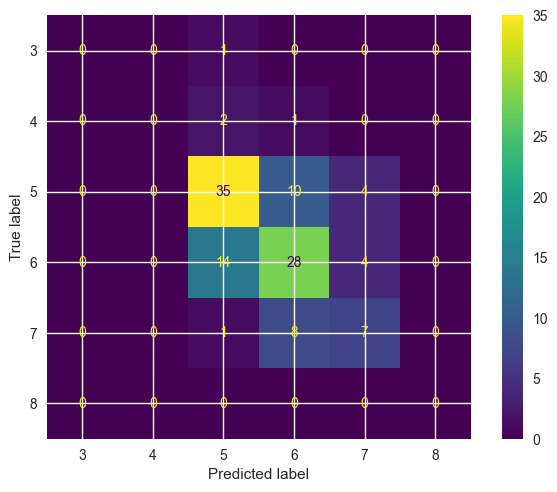

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = mlp.predict(x_test_ss)
print('Results on the test set:')
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix( y_test, y_pred, labels=mlp.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mlp.classes_)
disp.plot()
plt.show()

#### we define a plot function to visualize the performance of the neural network model evaluated by the cross validation method

In [ ]:
def plot_stacked_bar_charts(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        fig, ax =plt.subplots(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold","6th Fold", "7th Fold", "8th Fold", "9th Fold"]
        width = 0.35
        X_axis = np.arange(len(labels))
        ax.bar(labels, train_data, width,  label='Training')
        ax.bar(labels, val_data, width, bottom=train_data,
        label='Validation')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_title(plot_title)
        ax.legend()
        plt.show()

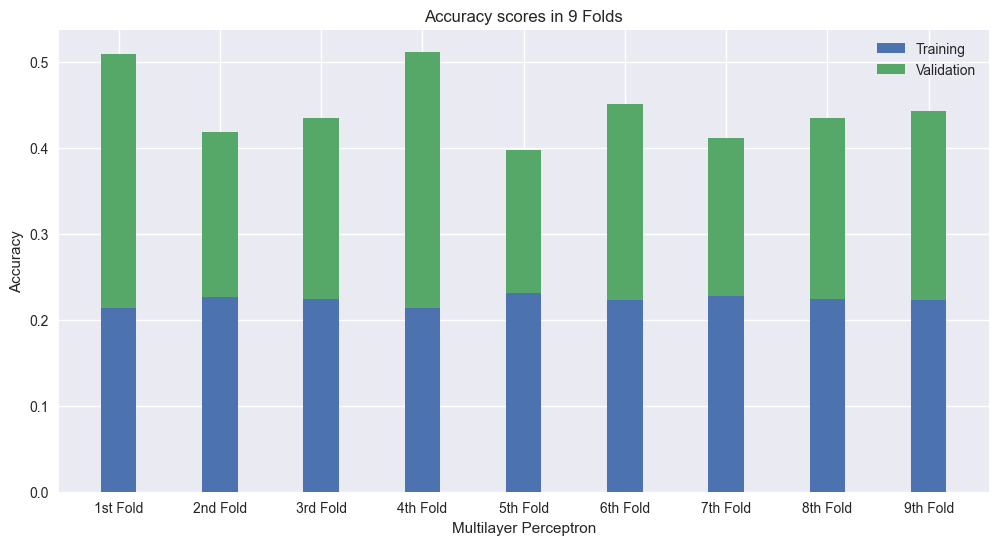

In [ ]:
from sklearn.model_selection import cross_validate 
result = cross_validate(mlp, x_train_ss, y_train, return_train_score=True,cv = 9)

plot_stacked_bar_charts("Multilayer Perceptron", "Accuracy", "Accuracy scores in 9 Folds", result['train_score'], result['test_score'])

#### From the model accuracy on different data fold, which is used as the validation set, we can observe that the accuracy on the validation set is still much lower than that on the training set. It is likely that overfitting occurs such that the model cannot work well on validation data folds. 

### 3.3 Test

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = mlp.predict(x_test_ss)
print('Results on the test set:')
print(classification_report(y_test, y_pred))


Results on the test set:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.66      0.71      0.69        49
           6       0.60      0.61      0.60        46
           7       0.47      0.44      0.45        16

    accuracy                           0.61       115
   macro avg       0.34      0.35      0.35       115
weighted avg       0.58      0.61      0.60       115



#### We further evaluate the trained model on the test sample set, which yields even poorer model accuracy. In view of that, we conclude that neural network is not a wise choice for solving this problem. We attempt to train a Naive Bayes model to solve this problem next. 

## 4. Naive Bayes

Since the performance of the neural network model is not satisfactory, we build a new model with Naive Bayes method. 

For Naive Bayes model, the input must be non-negative values. Thus, we transform all feature values as non-negative numbers. Here, we adopt MinMaxScaler() method. 


In [ ]:
from sklearn.preprocessing import MinMaxScaler

obje_mm=MinMaxScaler()

x_train_mm = obje_mm.fit_transform(x_train)
x_test_mm = obje_mm.fit_transform(x_test)

### 4.1 Model generation

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(
    alpha=0.0, # laplace smoothing parameter, alpha=0 means there is no smoothing
)
nb.fit(x_train_mm,y_train)

MultinomialNB(alpha=0.0)

### 4.2 Model Evaluation
We further evaluate the Navie Bayes model by using the cross validation method and the testing set. 

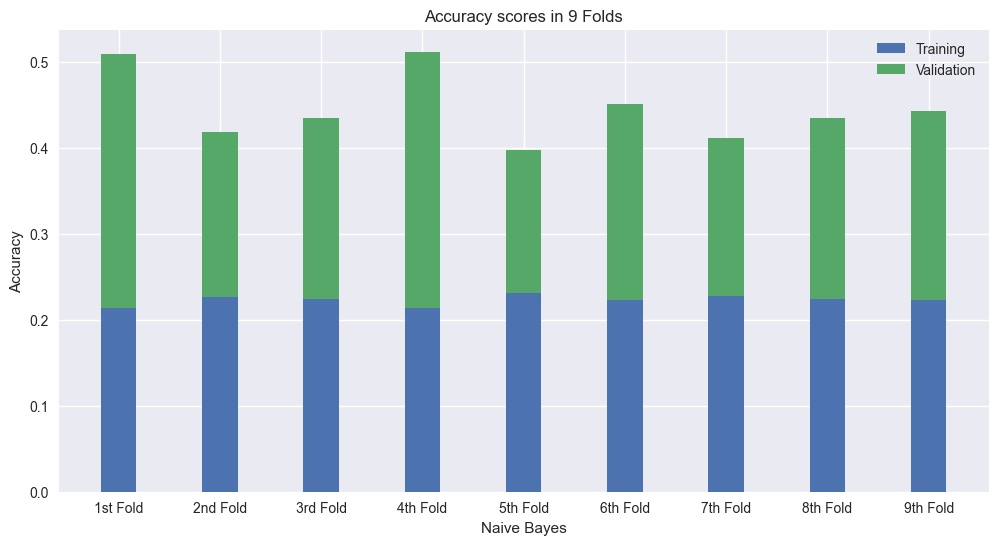

In [ ]:
from sklearn.model_selection import cross_validate
_scoring = 'accuracy'
results = cross_validate(
    estimator=nb,
    X = x_train_mm,
    y = y_train, 
    cv = 9,
    scoring = _scoring,
)
plot_stacked_bar_charts("Naive Bayes", "Accuracy", "Accuracy scores in 9 Folds", result['train_score'], result['test_score'])


#### Unfortunately, the Naive Bayes model cannot work well on the validation set as well. Perhaps these features are not effective in predicting the target variable. Our claim can be supported by the following performance evaluation on the test set. 

### 4.3 Test 

In [ ]:
from sklearn.metrics import classification_report

y_true, y_pred = y_test , nb.predict(x_test_mm)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.51      0.78      0.62        49
           6       0.39      0.35      0.37        46
           7       0.00      0.00      0.00        16

    accuracy                           0.47       115
   macro avg       0.18      0.22      0.20       115
weighted avg       0.37      0.47      0.41       115



#### Unfortunately, the model performance is not satisfactory as well.  Since that we cannot get satisficatory by training either neural network or Naive Bayes model, we believe there is some problem with the dataset. These features possibly have a low correlation with the target variable such that we cannot utilize them for accurately predicting the target variable. 